# 1. 분석 개요

### 1.1 분석 목적
> __*연수구 원도심 쇠퇴 지수 개발을 통한 활성화 우선순위 및 방향성 제안*__
* 다양한 기존의 원도심 쇠퇴 관련 연구를 바탕으로 연수구 맞춤 쇠퇴 지수를 개발한다.
* 개발한 쇠퇴 점수를 바탕으로 활성화 우선순위를 제안하고, 쇠퇴에 영향을 준 요인을 파악한다.
* 동별 민원 분석을 통해 실제 거주민들의 요구사항을 파악하여 활성화 방향성을 제안한다. 

### 1.2 분석 과정
> __*데이터 전처리 -> 쇠퇴 요인 선정 -> 쇠퇴 지수 개발 -> 민원 심층 분석*__
* 데이터 전처리
    * 격자 데이터 전처리
    * 인구 데이터 전처리
    * 건물 데이터 전처리
* 쇠퇴 요인 선정
    * 인구 쇠퇴 요인
    * 건물 쇠퇴 요인
* 쇠퇴 지수 개발
    * 최종 쇠퇴 요인
    * 최종 쇠퇴 지수
* 민원 심층 분석
    * 전체 민원 분석
    * 동별 민원 분석

### 1.3 분석 준비

In [ ]:
##콤파스 데이터 업로드
from geoband.API import *
GetCompasData('SBJ_2208_001', '1', '1_연수구_전입현황.xlsx')
GetCompasData('SBJ_2208_001', '2', '2_연수구_전출현황.xlsx')
GetCompasData('SBJ_2208_001', '3', '3_연수구_거주인구_격자매핑.xlsx')
GetCompasData('SBJ_2208_001', '4', '4_연수구_독거노인.csv')
GetCompasData('SBJ_2208_001', '5', '5_연수구_성연령별_주민등록인구.xlsx')
GetCompasData('SBJ_2208_001', '6', '6_연수구_세대원수별_세대수.xlsx')
GetCompasData('SBJ_2208_001', '7', '7_연수구_기초생활수급대상자.xlsx')
GetCompasData('SBJ_2208_001', '8', '8_연수구_고충민원_격자매핑.xlsx')
GetCompasData('SBJ_2208_001', '9', '9_연수구_민원현황_격자매핑.xlsx')
GetCompasData('SBJ_2208_001', '10', '10_연수구_건축물대장_표제부.xlsx')
GetCompasData('SBJ_2208_001', '11', '11_연수구_상권정보.csv')
GetCompasData('SBJ_2208_001', '12', '12_연수구_학교현황.xlsx')
GetCompasData('SBJ_2208_001', '13', '13_연수구_차량등록현황_격자매핑.csv')
GetCompasData('SBJ_2208_001', '14', '14_연수구_112신고수_격자매핑.csv')
GetCompasData('SBJ_2208_001', '15', '15_연수구_아파트_매매_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '16', '16_연수구_연립다세대_매매_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '17', '17_연수구_단독다가구_매매_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '18', '18_연수구_오피스텔_매매_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '19', '19_연수구_아파트_전월세_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '20', '20_연수구_연립다세대_전월세_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '21', '21_연수구_단독다가구_전월세_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '23', '23_연수구_상업업무용_매매_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '24', '24_연수구_토지_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '25', '25_연수구_분양입주권_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '26', '26_연수구_개별공시지가.xlsx')
GetCompasData('SBJ_2208_001', '27', '27_연수구_교통사고_격자매핑.xlsx')
GetCompasData('SBJ_2208_001', '28', '28_연수구_격자_100X100.geojson')

In [1]:
##라이브러리 로드
import pandas as pd
import numpy as np
import os
import re
import sys
sys.setrecursionlimit(100000)
import json
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
!pip install shapely
!pip install geopy
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point, Polygon
import statsmodels.api as sm
from impyute.imputation.cs import fast_knn
from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
!pip install konlpy
!pip install soynlp
from konlpy.tag import Kkma, Komoran, Okt, Mecab
from nltk.corpus import stopwords
import soynlp
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import collections
import itertools
!pip install lda
import lda
import requests
import csv
import time
import math
import operator
from collections import Counter
from collections import defaultdict
from pandas import read_table
from bs4 import BeautifulSoup
!pip install KRWordRank
from krwordrank.word import summarize_with_keywords
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
!pip install pyLDAvis
import pyLDAvis.sklearn

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


['NanumGothic']


[nltk_data] Downloading package punkt to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /opt/app-root/src/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. 데이터 전처리

### 2.1 격자 데이터 전처리(1) - 행정동경계

* 활용 데이터
    * 28_연수구_격자_100X100.geojson: 콤파스 제공 데이터
    * HangJeongDong_ver20220401.geojson: 행정동 경계 데이터(https://github.com/vuski/admdongkor)  
* 최종 산출물
    * gid_hjd_geo.geojson: 매핑실패 939건
* 분석 내용
    * 콤파스 제공 격자 데이터에 읍면동 정보가 누락되어 있으므로 제일 먼저 이를 만들어주었다.
    * 행정동 경계 데이터를 이용하여 각 격자가 해당 행정동에 포함되면 라벨링 해주었다.
    * 단, 행정동 경계 부근의 격자가 잘 라벨링 되지 않아 이후 추가적인 방법을 적용해야 했다.

In [49]:
##gid_hjd_geo.geojson 데이터 생성

#데이터 로드
gid = gpd.read_file('28_연수구_격자_100X100.geojson') #연수구격자데이터(compas제공)
hjd = gpd.read_file('HangJeongDong_ver20220401.geojson') #대한민국행정동경계데이터(외부데이터)
hjd = hjd[hjd['sggnm']=='연수구']

#행정동별 폴리곤 변환
hjd_polys = {}
multi_polys = list(hjd['geometry'])
for i in tqdm(range(len(multi_polys))):
    polys = []
    if multi_polys[i].geom_type == "MultiPolygon":
        for poly in multi_polys[i]:
            polys.append(poly)
    hjd_polys[hjd['adm_nm'].iloc[i]] = polys
    
#행정동별 격자 매핑
hjd_dict = {}
for i in list(hjd_polys.keys()):
    hjd_dict[i] = []

hjd_key = list(hjd_polys.keys())

for c in tqdm(range(len(list(gid['geometry'])))):
    for i, key in enumerate(hjd_key):
        hjd_poly = hjd_polys[key]
        for poly in hjd_poly:
            if poly.contains(gid['geometry'].iloc[c]):
                hjd_dict[hjd['adm_nm'].iloc[i]].append(gid['gid'].iloc[c])

#격자별 행정동 매핑
new_dict = {}
for key, val in zip(list(hjd_dict.keys()), list(hjd_dict.values())):
    for v in val:
        new_dict[v] = key

#최종 데이터프레임 저장
new = pd.DataFrame()
new['gid'] = new_dict.keys()
new['hjd'] = new_dict.values()
res = pd.merge(gid, new, on='gid', how='left')
res.to_file('gid_hjd_geo.geojson', driver='GeoJSON')
print('매핑실패: {}건'.format(res.hjd.isnull().sum()))
display(res)

100%|██████████| 5831/5831 [00:10<00:00, 537.18it/s]


매핑실패: 939건


,gid,geometry,hjd
0,다사241332,"MULTIPOLYGON (((126.64252 37.39480, 126.64251 ...",인천광역시 연수구 송도2동
1,다사270346,"MULTIPOLYGON (((126.67514 37.40765, 126.67513 ...",인천광역시 연수구 동춘3동
2,다사268350,"MULTIPOLYGON (((126.67284 37.41124, 126.67283 ...",NaN
3,다사252358,"MULTIPOLYGON (((126.65468 37.41832, 126.65467 ...",인천광역시 연수구 옥련1동
4,다사241367,"MULTIPOLYGON (((126.64216 37.42634, 126.64215 ...",인천광역시 연수구 옥련2동
...,...,...,...
5826,다사213323,"MULTIPOLYGON (((126.61098 37.38645, 126.61097 ...",인천광역시 연수구 송도4동
5827,다사246323,"MULTIPOLYGON (((126.64826 37.38673, 126.64825 ...",인천광역시 연수구 송도1동
5828,다사254290,"MULTIPOLYGON (((126.65763 37.35705, 126.65762 ...",인천광역시 연수구 송도3동
5829,다사251322,"MULTIPOLYGON (((126.65391 37.38587, 126.65390 ...",인천광역시 연수구 송도1동


### 2.1 격자 데이터 전처리(2) - 역지오코딩

* 활용 데이터
    * 연수구_위경도.csv: Q-GIS에서 전처리한 데이터
* 최종 산출물
    * 연수구_위경도_읍면동.csv: 매핑실패 137건
* 분석 내용
    * Q-GIS의 중심점 추출 기능을 통해 각 격자의 위경도 좌표를 추출한 데이터를 이용했다.
    * 이후 위경도를 좌표로 변환하는 역지오코딩을 이용해 격자별 읍면동 라벨링을 진행했다.

In [50]:
##연수구_위경도_읍면동.csv 데이터 생성

#데이터 로드
df = pd.read_csv('연수구_위경도.csv', encoding='cp949') #격자위경도데이터(Q-GIS전처리)
df = df.rename(columns={'x':'경도', 'y':'위도'})
df = df.reindex(['gid','위도','경도'], axis=1)

#위경도 -> 주소 변환 함수
def reverse_geocoding(lat_lon_str):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lon_str)
    return address

#위경도 -> 읍면동 추출 함수
def extract_emd(df_lat, df_lon):
    lat_lon_str = str(df_lat)+','+str(df_lon)
    add = reverse_geocoding(lat_lon_str)
    add_list = str(add).split(',')
    emd = [i for i in range(len(add_list)) if '동' in add_list[i]]
    result = add_list[emd[0]].strip()  
    if result[-1]=='동':
        return result
    
#읍면동 추출
emd_list = []
for i in tqdm(range(len(df))):
    try:
        emd_list.append(extract_emd(df['위도'][i], df['경도'][i]).strip())
    except:
        emd_list.append('매핑실패')
df['읍면동'] = emd_list

#데이터 저장
df.to_csv('연수구_위경도_읍면동.csv')
print('매핑실패: {}건'.format(len(df[df['읍면동']=='매핑실패'])))
display(df)

100%|██████████| 5831/5831 [1:04:29<00:00,  1.51it/s]

매핑실패: 137건


,gid,위도,경도,읍면동
0,다사298375,37.434458,126.707058,구월1동
1,다사298374,37.433556,126.707068,선학동
2,다사297377,37.436253,126.705909,매핑실패
3,다사297376,37.435351,126.705918,구월1동
4,다사297375,37.434450,126.705928,선학동
...,...,...,...,...
5826,다사187283,37.350633,126.582614,송도동
5827,다사187282,37.349732,126.582625,송도동
5828,다사187281,37.348830,126.582636,송도동
5829,다사187280,37.347929,126.582647,송도동


### 2.1 격자 데이터 전처리(3) - 병합

* 활용 데이터
    * gid_hjd_geo.geojson: 앞서 전처리한 데이터(매핑실패 939건)
    * 연수구_위경도_읍면동.csv: 앞서 전처리한 데이터(매핑실패 137건)
* 최종 산출물
    * compas_gid_final.geojson: 매핑실패 91건
* 분석 내용
    * 위에서 전처리한 두 가지 격자-읍면동 데이터의 정보를 모두 사용해 최종 격자데이터를 산출하였다.
    * 정상적인 읍면동 추출이 되지 않은 91건의 데이터를 제외하고 모두 매핑에 성공하였다.
    * 최종적으로 매핑실패한 격자에 대해선 뒤의 분석에서 제외하고 진행할 예정이다.

In [51]:
##compas_gid_final.geojson 데이터 생성

#데이터 로드
격자1 = gpd.read_file('gid_hjd_geo.geojson', encoding='utf-8-sig')
격자2 = pd.read_csv('연수구_위경도_읍면동.csv').iloc[:, 1:]

#데이터 병합
격자 = pd.merge(격자1, 격자2, on='gid', how='inner')

#결측값 대체
for i in range(len(격자)):
    if 격자['hjd'].iloc[i]==None:
        격자['hjd'].iloc[i]=격자['읍면동'].iloc[i]

#읍면동 이름 칼럼 생성
def make_emd(x):
    emd_li = ['송도1동', '송도2동', '송도3동', '송도4동', '송도5동', '송도동',
              '연수1동', '연수2동', '연수3동', '연수동',
              '동춘1동', '동춘2동', '동춘3동', '동춘동',  
              '옥련1동', '옥련2동', '옥련동',  
              '청학동', '선학동']
    if x.strip() in emd_li:
        return x.strip()
    else:
        return '매핑실패'
    
격자['emd_nm'] = [s.split()[-1] for s in 격자['hjd']]
격자['emd_nm'] = 격자['emd_nm'].apply(make_emd)
print('연수구 전체 격자 개수: {}개'.format(len(격자)))
print('읍면동 매핑실패 격자 개수: {}개'.format(len(격자[격자['emd_nm']=='매핑실패'])))

#행정동 이름 칼럼 생성
def make_hjd(x):
    hjd_li = ['송도1동', '송도2동', '송도3동', '송도4동', '송도5동',
              '연수1동', '연수2동', '연수3동',
              '동춘1동', '동춘2동', '동춘3동',  
              '옥련1동', '옥련2동',  
              '청학동', '선학동']
    if x.strip() in hjd_li:
        return x.strip()
    else:
        return '매핑실패'
    
격자['hjd_nm'] = 격자['emd_nm'].apply(make_hjd)
print('행정동 매핑실패 격자 개수: {}개'.format(len(격자[격자['hjd_nm']=='매핑실패'])))

#법정동 이름 칼럼 생성
def make_bjd(x):
    if x[:2] == '송도':
        return '송도동'
    elif x[:2] == '연수':
        return '연수동'
    elif x[:2] == '동춘':
        return '동춘동'
    elif x[:2] == '옥련':
        return '옥련동'
    elif x[:2] == '청학':
        return '청학동'
    elif x[:2] == '선학':
        return '선학동'
    else:
        return '매핑실패'
    
격자['bjd_nm'] = 격자['emd_nm'].apply(make_bjd)
print('법정동 매핑실패 격자 개수: {}개'.format(len(격자[격자['bjd_nm']=='매핑실패'])))
            
#원도심/신도시 칼럼 생성
def make_label(x):
    if x=='송도동':
        return '신도시'
    elif x=='매핑실패':
        return '매핑실패'
    else:
        return '원도심'
    
격자['label'] = 격자['bjd_nm'].apply(make_label)
print(격자['label'].value_counts())    
    
#최종 데이터프레임 저장
격자.drop(['hjd', '읍면동'], axis=1, inplace=True)
격자.to_file('compas_gid_final.geojson', driver='GeoJSON')
display(격자)

연수구 전체 격자 개수: 5831개
읍면동 매핑실패 격자 개수: 91개
행정동 매핑실패 격자 개수: 239개
법정동 매핑실패 격자 개수: 91개
신도시     3900
원도심     1840
매핑실패      91
Name: label, dtype: int64


,gid,geometry,위도,경도,emd_nm,hjd_nm,bjd_nm,label
0,다사241332,"MULTIPOLYGON (((126.64252 37.39480, 126.64251 ...",37.395253,126.643076,송도2동,송도2동,송도동,신도시
1,다사270346,"MULTIPOLYGON (((126.67514 37.40765, 126.67513 ...",37.408104,126.675698,동춘3동,동춘3동,동춘동,원도심
2,다사268350,"MULTIPOLYGON (((126.67284 37.41124, 126.67283 ...",37.411693,126.673398,동춘3동,동춘3동,동춘동,원도심
3,다사252358,"MULTIPOLYGON (((126.65468 37.41832, 126.65467 ...",37.418776,126.655239,옥련1동,옥련1동,옥련동,원도심
4,다사241367,"MULTIPOLYGON (((126.64216 37.42634, 126.64215 ...",37.426798,126.642717,옥련2동,옥련2동,옥련동,원도심
...,...,...,...,...,...,...,...,...
5826,다사213323,"MULTIPOLYGON (((126.61098 37.38645, 126.61097 ...",37.386908,126.611542,송도4동,송도4동,송도동,신도시
5827,다사246323,"MULTIPOLYGON (((126.64826 37.38673, 126.64825 ...",37.387182,126.648816,송도1동,송도1동,송도동,신도시
5828,다사254290,"MULTIPOLYGON (((126.65763 37.35705, 126.65762 ...",37.357504,126.658185,송도3동,송도3동,송도동,신도시
5829,다사251322,"MULTIPOLYGON (((126.65391 37.38587, 126.65390 ...",37.386321,126.654474,송도1동,송도1동,송도동,신도시


### 2.2 인구 데이터 전처리

* 활용 데이터
    * compas_gid_final.geojson: 전처리한 격자 데이터
    * 1_연수구_전입현황.xlsx: 콤파스 제공 데이터
    * 2_연수구_전출현황.xlsx: 콤파스 제공 데이터
    * 3_연수구_거주인구_격자매핑.xlsx: 콤파스 제공 데이터
    * 4_연수구_독거노인.csv: 콤파스 제공 데이터
    * 7_연수구_기초생활수급대상자.xlsx: 콤파스 제공 데이터
    * 8_연수구_고충민원_격자매핑.xlsx: 콤파스 제공 데이터
    * 9_연수구_민원현황_격자매핑.xlsx: 콤파스 제공 데이터
    * 14_연수구_112신고수_격자매핑.csv: 콤파스 제공 데이터
    * 27_연수구_교통사고_격자매핑.xlsx: 콤파스 제공 데이터
    * 인천광역시_법정동별 면적_20220131.csv: 인천시 면적 데이터(https://www.data.go.kr/data/15077426/fileData.do?recommendDataYn=Y)
    * nlsp_021001007.shp: 연수구 생산가능인구 데이터(http://map.ngii.go.kr/ms/map/NlipMap.do?tabGb=statsMap)
* 최종 산출물
    * compas_people_final.csv: 인구 관련 쇠퇴 요인을 격자 기준으로 합친 데이터
* 분석 내용
    * 자료조사 및 EDA를 바탕으로 발견한 여러가지 쇠퇴 관련 요인을 크게 인구/건물 부문으로 나누어서 살펴보고자 한다.
    * 특히 인구 관련 변수로 '인구밀도', '인구유입', '독거노인', '기초생활수급자', '생산가능인구', '민원건수', '사고및범죄'를 선정하였다.
    * 따라서 이와 관련된 데이터들을 전처리된 격자 데이터 기준으로 합쳐서 뒤의 분석에 활용할 것이다.

In [52]:
#데이터 로드
df = gpd.read_file('compas_gid_final.geojson', encoding='utf-8-sig')
df1 = pd.read_excel('1_연수구_전입현황.xlsx', sheet_name=None)
df1 = pd.concat(df1, ignore_index=True)
df2 = pd.read_excel('2_연수구_전출현황.xlsx', sheet_name=None)
df2 = pd.concat(df2, ignore_index=True)
df3 = pd.read_excel('3_연수구_거주인구_격자매핑.xlsx', sheet_name=None)
df3 = pd.concat(df3, ignore_index=True)
df4 = pd.read_csv('4_연수구_독거노인.csv')
df7 = pd.read_excel('7_연수구_기초생활수급대상자.xlsx').iloc[1:, :]
df8 = pd.read_excel('8_연수구_고충민원_격자매핑.xlsx', sheet_name=None)
df8 = pd.concat(df8, ignore_index=True)
df9 = pd.read_excel('9_연수구_민원현황_격자매핑.xlsx', sheet_name=None)
df9 = pd.concat(df9, ignore_index=True)
df14 = pd.read_csv('14_연수구_112신고수_격자매핑.csv')
df27 = pd.read_excel('27_연수구_교통사고_격자매핑.xlsx')
etc1 = pd.read_csv('인천광역시_법정동별 면적_20220131.csv', encoding='euc-kr')
etc1 = etc1[etc1['군구명']=='연수구']
etc2 = gpd.read_file('nlsp_021001007.shp', encoding='utf-8-sig')

#전입인구 정보 추가
df1 = df1.groupby('emd_nm')['cnt'].sum().reset_index()
tmp = pd.merge(df, df1[['emd_nm', 'cnt']], how='left', on='emd_nm')
tmp.rename(columns={'cnt': '전입'}, inplace=True)

#전출인구 정보 추가
df2 = df2.groupby('emd_nm')['cnt'].sum().reset_index()
tmp = pd.merge(tmp, df2[['emd_nm', 'cnt']], how='left', on='emd_nm')
tmp.rename(columns={'cnt': '전출'}, inplace=True)

#거주인구 정보 추가
df3 = df3.melt(id_vars='gid')
df3 = df3.groupby('gid')['value'].sum().reset_index()
tmp = pd.merge(tmp, df3, how='left', on='gid')
tmp.rename(columns={'value': '거주인구'}, inplace=True)

#독거노인 정보 추가
df4 = df4.groupby('emd_nm')['tot_cnt'].sum().reset_index()
tmp = pd.merge(tmp, df4[['emd_nm', 'tot_cnt']], how='left', on='emd_nm')
tmp.rename(columns={'tot_cnt': '독거노인'}, inplace=True)

#기초생활수급대상자 정보 추가
tmp = pd.merge(tmp, df7[['emd_nm', 'total_pop']], how='left', on='emd_nm')
tmp.rename(columns={'total_pop': '기초생활수급대상자'}, inplace=True)

#민원건수 정보 추가
df89 = pd.concat([df8, df9], axis=0)
df89 = df89.groupby('gid')['compl_contents'].count().reset_index()
tmp = pd.merge(tmp, df89, how='left', on='gid')
tmp.rename(columns={'compl_contents': '민원건수'}, inplace=True)

#112신고 정보 추가
df14 = df14.groupby('gid')['cnt'].sum().reset_index()
tmp = pd.merge(tmp, df14, how='left', on='gid')
tmp.rename(columns={'cnt': '신고건수'}, inplace=True)

#교통사고 정보 추가
df27 = df27.melt(id_vars='gid')
df27 = df27.groupby('gid')['value'].sum().reset_index()
tmp = pd.merge(tmp, df27, how='left', on='gid')
tmp.rename(columns={'value': '사고건수'}, inplace=True)

#면적 정보 추가 
tmp = pd.merge(tmp, etc1[['토지소재', '면적(제곱미터)']], how='left', left_on='bjd_nm', right_on='토지소재')
tmp.drop(['토지소재'], axis=1, inplace=True)
tmp.rename(columns={'면적(제곱미터)': '면적'}, inplace=True)

#생산가능인구 정보 추가
tmp = pd.merge(tmp, etc2[['gid', 'val']], how='left', on='gid')
tmp.rename(columns={'val': '생산가능인구'}, inplace=True)

#데이터 저장
tmp.to_csv('compas_people_final.csv', encoding='utf-8-sig', index=False)
display(tmp)

,gid,위도,경도,emd_nm,hjd_nm,bjd_nm,label,geometry,전입,전출,거주인구,독거노인,기초생활수급대상자,민원건수,신고건수,사고건수,면적,생산가능인구
0,다사241332,37.395253,126.643076,송도2동,송도2동,송도동,신도시,"MULTIPOLYGON (((126.64252 37.39480, 126.64251 ...",51329.0,38295.0,14116,1212.0,33.0,206.0,192.0,0,37984000.1,1022.0
1,다사270346,37.408104,126.675698,동춘3동,동춘3동,동춘동,원도심,"MULTIPOLYGON (((126.67514 37.40765, 126.67513 ...",12673.0,15135.0,7271,1123.0,58.0,8.0,169.0,0,5815802.8,610.0
2,다사268350,37.411693,126.673398,동춘3동,동춘3동,동춘동,원도심,"MULTIPOLYGON (((126.67284 37.41124, 126.67283 ...",12673.0,15135.0,602,1123.0,58.0,60.0,70.0,0,5815802.8,79.0
3,다사252358,37.418776,126.655239,옥련1동,옥련1동,옥련동,원도심,"MULTIPOLYGON (((126.65468 37.41832, 126.65467 ...",22588.0,24488.0,0,4245.0,605.0,7.0,38.0,1,4068545.0,6.0
4,다사241367,37.426798,126.642717,옥련2동,옥련2동,옥련동,원도심,"MULTIPOLYGON (((126.64216 37.42634, 126.64215 ...",21402.0,24053.0,159,3038.0,331.0,10.0,73.0,4,4068545.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5826,다사213323,37.386908,126.611542,송도4동,송도4동,송도동,신도시,"MULTIPOLYGON (((126.61098 37.38645, 126.61097 ...",26910.0,13203.0,0,736.0,43.0,NaN,NaN,0,37984000.1,NaN
5827,다사246323,37.387182,126.648816,송도1동,송도1동,송도동,신도시,"MULTIPOLYGON (((126.64826 37.38673, 126.64825 ...",50127.0,41947.0,0,1522.0,57.0,1.0,14.0,1,37984000.1,NaN
5828,다사254290,37.357504,126.658185,송도3동,송도3동,송도동,신도시,"MULTIPOLYGON (((126.65763 37.35705, 126.65762 ...",48298.0,34069.0,0,2162.0,80.0,NaN,NaN,0,37984000.1,NaN
5829,다사251322,37.386321,126.654474,송도1동,송도1동,송도동,신도시,"MULTIPOLYGON (((126.65391 37.38587, 126.65390 ...",50127.0,41947.0,0,1522.0,57.0,4.0,17.0,3,37984000.1,NaN


### 2.3 건물 데이터 전처리

* 활용 데이터
    * compas_gid_final.geojson: 전처리한 격자 데이터
    * 10_연수구_건축물대장_표제부.xlsx: 콤파스 제공 데이터
    * 11_연수구_상권정보.csv: 콤파스 제공 데이터
    * 12_연수구_학교현황.xlsx: 콤파스 제공 데이터
    * 13_연수구_차량등록현황_격자매핑.csv: 콤파스 제공 데이터
    * 15_연수구_아파트_매매_실거래가.xlsx: 콤파스 제공 데이터
* 최종 산출물
    * compas_building_final.csv: 건물 관련 쇠퇴 요인을 격자 기준으로 합친 데이터
* 분석 내용
    * 이어서 건물 관련 변수로 '아파트실거래가', '건축물노후도', '공실률', '교육인프라', '상권인프라', '교통인프라'를 선정하였다.
    * 마찬가지로 이와 관련된 데이터들을 전처리된 격자 데이터 기준으로 합친 데이터프레임을 생성하였다. 

In [53]:
#데이터 로드
df = gpd.read_file('compas_gid_final.geojson', encoding='utf-8-sig')
df10 = pd.read_excel('10_연수구_건축물대장_표제부.xlsx')
df11 = pd.read_csv('11_연수구_상권정보.csv')
df12 = pd.read_excel('12_연수구_학교현황.xlsx', sheet_name=None)
df12 = pd.concat(df12, ignore_index=True)
df13 = pd.read_csv('13_연수구_차량등록현황_격자매핑.csv')
df15 = pd.read_excel('15_연수구_아파트_매매_실거래가.xlsx')

#공실률 정보 추가
def emdcd_to_emdnm(x): #코드-이름 매핑
    if x==10100:
        return '옥련동'
    elif x==10200:
        return '선학동'
    elif x==10300:
        return '연수동'
    elif x==10400:
        return '청학동'
    elif x==10500:
        return '동춘동'
    elif x==10600:
        return '송도동'

def vacancy_rate(df): #공실률 계산 
    return (len(df[df['hshld_num']==0])/len(df))*100

dic = {}
for i in df10['emd_cd'].unique():
    dic[i] = vacancy_rate(df10[df10['emd_cd']==i])

df10 = pd.DataFrame(dic.items(), columns=['emd_cd', '공실률'])
df10['emd_nm2'] = df10['emd_cd'].apply(emdcd_to_emdnm)
tmp = pd.merge(df, df10, how='left', left_on='bjd_nm', right_on='emd_nm2')
tmp.drop(['emd_cd', 'emd_nm2'], axis=1, inplace=True)

#상권 정보 추가
res = []
c = re.compile('\w\w동')
emd_list = ['송도동', '연수동', '청학동', '동춘동', '옥련동', '선학동']
for i in range(len(df11)): #읍면동 추출
    try: 
        temp = c.findall(df11['road_address'][i])
        if temp == []:
            res.append(np.nan)
        elif temp[0] in emd_list:
            res.append(temp[0])
        elif temp[-1] in emd_list:
            res.append(temp[-1])
        else:
            res.append(np.nan)
    except:
        temp = c.findall(df11['location_address'][i])
        if temp == []:
            res.append(np.nan)
        elif temp[0] in emd_list:
            res.append(temp[0])
        elif temp[-1] in emd_list:
            res.append(temp[-1])
        else:
            res.append(np.nan)
            
df11['emd_nm2'] = res
df11 = df11.groupby('emd_nm2')['store_type'].count().reset_index()
tmp = pd.merge(tmp, df11, how='left', left_on='bjd_nm', right_on='emd_nm2')
tmp.drop(['emd_nm2'], axis=1, inplace=True)
tmp.rename(columns={'store_type': '상권수'}, inplace=True)

#학교 정보 추가
c = re.compile('\w\w동')
emd_list = ['송도동', '연수동', '청학동', '동춘동', '옥련동', '선학동']
res = []
for i in range(len(df12)): #읍면동 추출
    temp = c.findall(df12['address'][i])
    if temp == []:
        res.append(np.nan)
    else:
        if temp[0] in emd_list:
            res.append(temp[0])
        elif temp[-1] in emd_list:
            res.append(temp[-1])
        else:
            res.append(np.nan)

df12['emd_nm2'] = res
df12 = df12.groupby('emd_nm2')['address'].count().reset_index()
tmp = pd.merge(tmp, df12, how='left', left_on='bjd_nm', right_on='emd_nm2')
tmp.drop(['emd_nm2'], axis=1, inplace=True)
tmp.rename(columns={'address': '학교수'}, inplace=True)

#차량 정보 추가
df13.dropna(subset=['emd_nm'], axis=0, inplace=True)
df13['emd_nm2'] = [s.split()[-1] for s in df13['emd_nm']]
df13 = df13.groupby('gid')['emd_nm2'].count().reset_index()
tmp = pd.merge(tmp, df13, how='left', on='gid')
tmp.rename(columns={'emd_nm2': '차량수'}, inplace=True)

#실거래가&건축년도 정보 추가
df15['emd_nm2'] = [s.split()[-1] for s in df15['bjd_nm']] #읍면동 추출
df15 = df15.groupby('emd_nm2')[['trade_price', 'cnstr_year']].mean().reset_index()
tmp = pd.merge(tmp, df15[['emd_nm2', 'trade_price', 'cnstr_year']], how='left', left_on='bjd_nm', right_on='emd_nm2')
tmp.drop(['emd_nm2'], axis=1, inplace=True)
tmp.rename(columns={'trade_price': '실거래가', 'cnstr_year': '건축년도'}, inplace=True)

#데이터 저장
tmp.to_csv('compas_building_final.csv', encoding='utf-8-sig', index=False)
display(tmp)

,gid,위도,경도,emd_nm,hjd_nm,bjd_nm,label,geometry,공실률,상권수,학교수,차량수,실거래가,건축년도
0,다사241332,37.395253,126.643076,송도2동,송도2동,송도동,신도시,"MULTIPOLYGON (((126.64252 37.39480, 126.64251 ...",73.957845,14323.0,466.0,420.0,59749.200806,2011.469394
1,다사270346,37.408104,126.675698,동춘3동,동춘3동,동춘동,원도심,"MULTIPOLYGON (((126.67514 37.40765, 126.67513 ...",64.461408,4310.0,188.0,339.0,27151.995786,1994.832676
2,다사268350,37.411693,126.673398,동춘3동,동춘3동,동춘동,원도심,"MULTIPOLYGON (((126.67284 37.41124, 126.67283 ...",64.461408,4310.0,188.0,40.0,27151.995786,1994.832676
3,다사252358,37.418776,126.655239,옥련1동,옥련1동,옥련동,원도심,"MULTIPOLYGON (((126.65468 37.41832, 126.65467 ...",68.360937,2969.0,154.0,5.0,22062.409773,1994.916228
4,다사241367,37.426798,126.642717,옥련2동,옥련2동,옥련동,원도심,"MULTIPOLYGON (((126.64216 37.42634, 126.64215 ...",68.360937,2969.0,154.0,58.0,22062.409773,1994.916228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5826,다사213323,37.386908,126.611542,송도4동,송도4동,송도동,신도시,"MULTIPOLYGON (((126.61098 37.38645, 126.61097 ...",73.957845,14323.0,466.0,NaN,59749.200806,2011.469394
5827,다사246323,37.387182,126.648816,송도1동,송도1동,송도동,신도시,"MULTIPOLYGON (((126.64826 37.38673, 126.64825 ...",73.957845,14323.0,466.0,11.0,59749.200806,2011.469394
5828,다사254290,37.357504,126.658185,송도3동,송도3동,송도동,신도시,"MULTIPOLYGON (((126.65763 37.35705, 126.65762 ...",73.957845,14323.0,466.0,NaN,59749.200806,2011.469394
5829,다사251322,37.386321,126.654474,송도1동,송도1동,송도동,신도시,"MULTIPOLYGON (((126.65391 37.38587, 126.65390 ...",73.957845,14323.0,466.0,NaN,59749.200806,2011.469394


# 3. 쇠퇴 요인 선정

### 3.1 인구 쇠퇴 요인

* 활용 데이터
    * compas_people_final.csv: 인구 관련 데이터를 병합한 데이터
* 최종 산출물
    * compas_people_final2.csv: 인구 관련 변수를 생성한 데이터 
* 분석 내용
    * 데이터 전처리 단계에서 합쳐놓은 인구 데이터를 바탕으로 쇠퇴 관련 변수를 Feature Engineering을 통해 생성하였다.
    * 또한 생성한 변수가 실제로 원도심과 신도시에서 유의한 차이를 가지는지 확인하기 위해 T-Test를 진행하였다.
    * 민원건수를 제외한 모든 인구 관련 쇠퇴 요인이 통계적으로 유의하다는 결론을 얻었다.
* 분석 결과
    * 인구밀도(거주인구/면적) -> 유의(원도심>신도시)
    * 인구유입(전입인구-전출인구) -> 유의(원도심<신도시)
    * 독거노인 -> 유의(원도심>신도시)
    * 기초수급생활대상자 -> 유의(원도심>신도시)
    * 생산가능인구 -> 유의(원도심>신도시)
    * 민원건수 -> 유의하지 않음(원도심=신도시)
    * 사고및범죄(교통사고+112신고) -> 유의(원도심>신도시)  

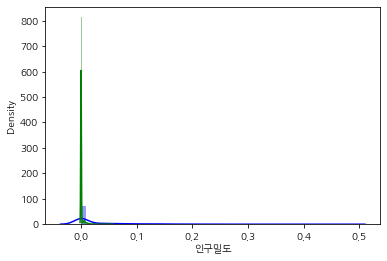

인구밀도 T-Test 결과: t-통계량은 30.683522520144994, p-값은 1.3968295795101267e-191입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


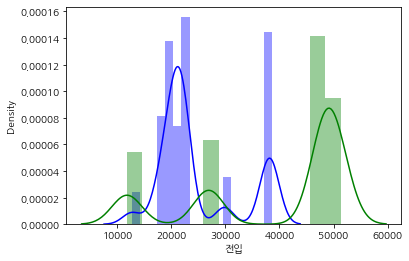

전입 T-Test 결과: t-통계량은 -40.7788358246972, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


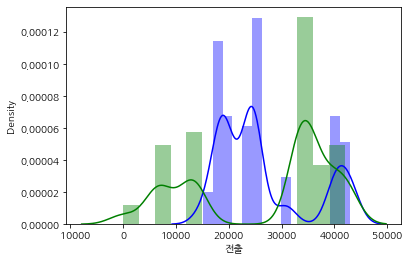

전출 T-Test 결과: t-통계량은 -1.496747451285179, p-값은 0.13451405196314747입니다.
p-value>0.05이므로 유의수준 5%에서 유의하지 않습니다.


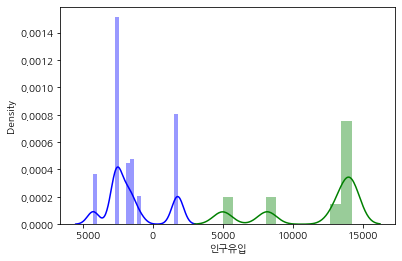

인구유입 T-Test 결과: t-통계량은 -151.13046615559227, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


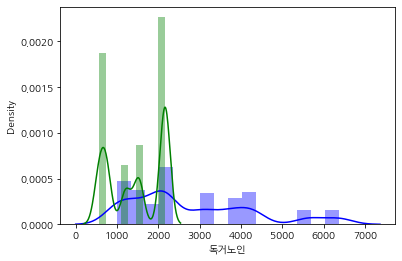

독거노인 T-Test 결과: t-통계량은 45.959410962538584, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


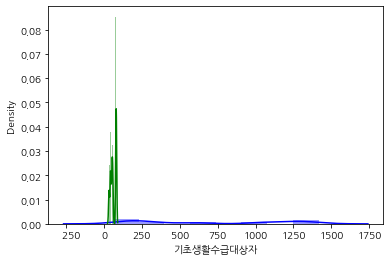

기초생활수급대상자 T-Test 결과: t-통계량은 81.60120822464793, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


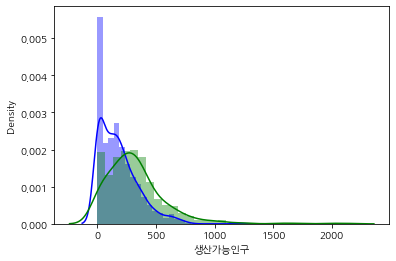

생산가능인구 T-Test 결과: t-통계량은 -11.643646817042336, p-값은 8.337663853307448e-30입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


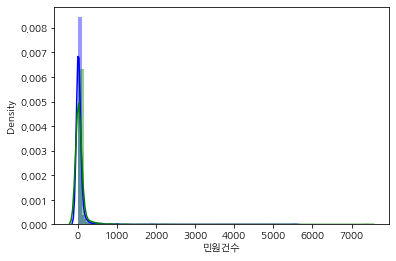

민원건수 T-Test 결과: t-통계량은 -1.255643966908164, p-값은 0.20938880973631085입니다.
p-value>0.05이므로 유의수준 5%에서 유의하지 않습니다.


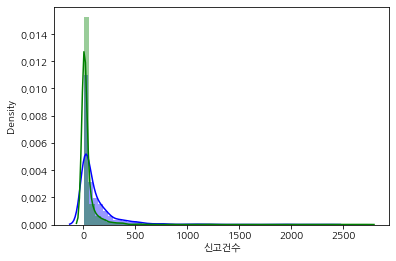

신고건수 T-Test 결과: t-통계량은 15.159706991598139, p-값은 1.9569535634943221e-50입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


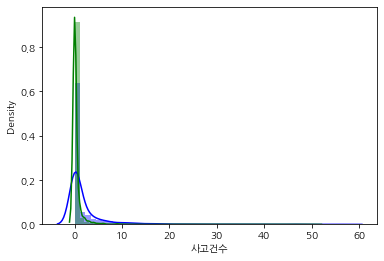

사고건수 T-Test 결과: t-통계량은 18.14016924847169, p-값은 1.4865765221495042e-71입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


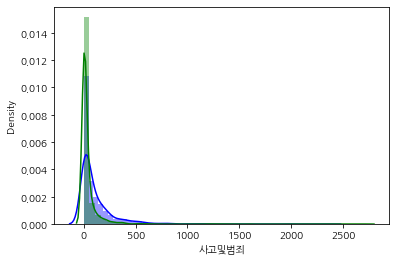

사고및범죄 T-Test 결과: t-통계량은 15.38721873053544, p-값은 7.318940951686288e-52입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


,gid,위도,경도,emd_nm,hjd_nm,bjd_nm,label,geometry,전입,전출,...,독거노인,기초생활수급대상자,민원건수,신고건수,사고건수,면적,생산가능인구,인구밀도,인구유입,사고및범죄
0,다사241332,37.395253,126.643076,송도2동,송도2동,송도동,신도시,MULTIPOLYGON (((126.6425163484002 37.394798226...,51329.0,38295.0,...,1212.0,33.0,206.0,192.0,0,37984000.1,1022.0,0.037163,13034.0,192.0
1,다사270346,37.408104,126.675698,동춘3동,동춘3동,동춘동,원도심,MULTIPOLYGON (((126.67513776011872 37.40764929...,12673.0,15135.0,...,1123.0,58.0,8.0,169.0,0,5815802.8,610.0,0.125021,-2462.0,169.0
2,다사268350,37.411693,126.673398,동춘3동,동춘3동,동춘동,원도심,MULTIPOLYGON (((126.67283843929438 37.41123865...,12673.0,15135.0,...,1123.0,58.0,60.0,70.0,0,5815802.8,79.0,0.010351,-2462.0,70.0
3,다사252358,37.418776,126.655239,옥련1동,옥련1동,옥련동,원도심,MULTIPOLYGON (((126.65467915263241 37.41832103...,22588.0,24488.0,...,4245.0,605.0,7.0,38.0,1,4068545.0,6.0,0.000000,-1900.0,39.0
4,다사241367,37.426798,126.642717,옥련2동,옥련2동,옥련동,원도심,MULTIPOLYGON (((126.64215669187895 37.42634299...,21402.0,24053.0,...,3038.0,331.0,10.0,73.0,4,4068545.0,31.0,0.003908,-2651.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,다사213323,37.386908,126.611542,송도4동,송도4동,송도동,신도시,MULTIPOLYGON (((126.6109824429482 37.386453142...,26910.0,13203.0,...,736.0,43.0,NaN,NaN,0,37984000.1,NaN,0.000000,13707.0,NaN
5736,다사246323,37.387182,126.648816,송도1동,송도1동,송도동,신도시,MULTIPOLYGON (((126.64825633224304 37.38672750...,50127.0,41947.0,...,1522.0,57.0,1.0,14.0,1,37984000.1,NaN,0.000000,8180.0,15.0
5737,다사254290,37.357504,126.658185,송도3동,송도3동,송도동,신도시,MULTIPOLYGON (((126.65762516324436 37.35704972...,48298.0,34069.0,...,2162.0,80.0,NaN,NaN,0,37984000.1,NaN,0.000000,14229.0,NaN
5738,다사251322,37.386321,126.654474,송도1동,송도1동,송도동,신도시,MULTIPOLYGON (((126.65391406327053 37.38586676...,50127.0,41947.0,...,1522.0,57.0,4.0,17.0,3,37984000.1,NaN,0.000000,8180.0,20.0


In [54]:
#데이터 로드
df = pd.read_csv('compas_people_final.csv')
df = df[df['label']!='매핑실패'].reset_index(drop=True)

#함수 정의
def do_ttest(df, col): #T-Test 및 시각화
    df_A = df[df['label']=='원도심']
    df_B = df[df['label']=='신도시']
    df_A.dropna(subset=[col], axis=0, inplace=True)
    df_B.dropna(subset=[col], axis=0, inplace=True)
    sns.distplot(df_A[col], color='blue') #원도심: blue
    sns.distplot(df_B[col], color='green') #신도시: green
    plt.show()
    t_stat, p_value = stats.ttest_ind(df_A[col], df_B[col], equal_var=True) 
    print('{} T-Test 결과: t-통계량은 {}, p-값은 {}입니다.'.format(col, t_stat, p_value))
    if p_value>0.05:
        print('p-value>0.05이므로 유의수준 5%에서 유의하지 않습니다.')
    else:
        print('p-value<0.05이므로 유의수준 5%에서 유의합니다.')
    
#인구밀도
df['인구밀도'] = (df['거주인구']/df['면적'])*100
do_ttest(df, '인구밀도')

#인구유입
df['인구유입'] = df['전입']-df['전출']
do_ttest(df, '전입') 
do_ttest(df, '전출') 
do_ttest(df, '인구유입') 

#독거노인
do_ttest(df, '독거노인') 

#기초생활수급대상자
do_ttest(df, '기초생활수급대상자') 

#생산가능인구
do_ttest(df, '생산가능인구') 

#민원건수
do_ttest(df, '민원건수')

#사고및범죄
df['사고및범죄'] = df['신고건수']+df['사고건수']
do_ttest(df, '신고건수')
do_ttest(df, '사고건수')
do_ttest(df, '사고및범죄')

#데이터 저장
df.to_csv('compas_people_final2.csv', encoding='utf-8-sig', index=False)
display(df)

### 3.2 건물 쇠퇴 요인

* 활용 데이터
    * compas_building_final.csv: 건물 관련 데이터를 병합한 데이터
* 최종 산출물
    * compas_building_final2.csv: 건물 관련 변수를 생성한 데이터 
* 분석 내용
    * 분석 과정은 인구 관련 변수와 동일하며, 모든 건물 관련 요인이 유의한 차이를 보임을 확인했다.
* 분석 결과
    * 아파트실거래가 -> 유의(원도심<신도시)
    * 건축물노후도(기준년도-건축년도) -> 유의(원도심>신도시)
    * 공실률(세대수가0인건축물수/전체건축물수) -> 유의(원도심<신도시)
    * 상권인프라(상권수) -> 유의(원도심<신도시)
    * 교육인프라(학교수) -> 유의(원도심<신도시)
    * 교통인프라(차량수) -> 유의(원도심<신도시)

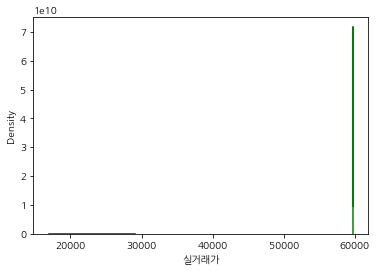

실거래가 T-Test 결과: t-통계량은 -766.8978926183663, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


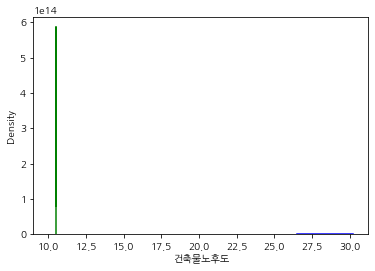

건축물노후도 T-Test 결과: t-통계량은 1244.8145994459594, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


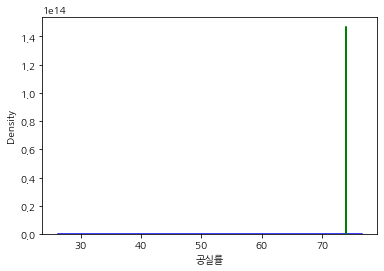

공실률 T-Test 결과: t-통계량은 -83.32304055626169, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


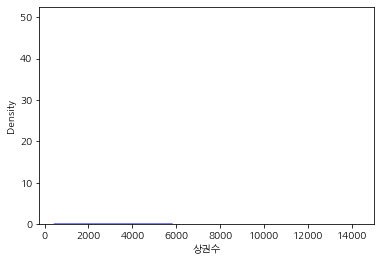

상권수 T-Test 결과: t-통계량은 -552.1133625224797, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


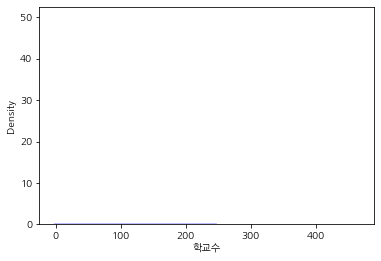

학교수 T-Test 결과: t-통계량은 -318.0173392340325, p-값은 0.0입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


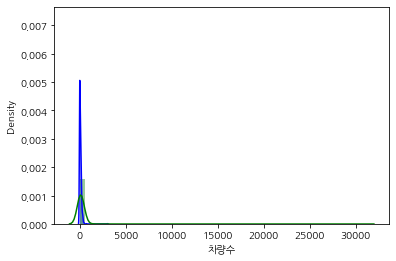

차량수 T-Test 결과: t-통계량은 -2.4179242868030006, p-값은 0.015728950217173198입니다.
p-value<0.05이므로 유의수준 5%에서 유의합니다.


,gid,위도,경도,emd_nm,hjd_nm,bjd_nm,label,geometry,공실률,상권수,학교수,차량수,실거래가,건축년도,건축물노후도
0,다사241332,37.395253,126.643076,송도2동,송도2동,송도동,신도시,MULTIPOLYGON (((126.6425163484002 37.394798226...,73.957845,14323.0,466.0,420.0,59749.200806,2011.469394,10.530606
1,다사270346,37.408104,126.675698,동춘3동,동춘3동,동춘동,원도심,MULTIPOLYGON (((126.67513776011872 37.40764929...,64.461408,4310.0,188.0,339.0,27151.995786,1994.832676,27.167324
2,다사268350,37.411693,126.673398,동춘3동,동춘3동,동춘동,원도심,MULTIPOLYGON (((126.67283843929438 37.41123865...,64.461408,4310.0,188.0,40.0,27151.995786,1994.832676,27.167324
3,다사252358,37.418776,126.655239,옥련1동,옥련1동,옥련동,원도심,MULTIPOLYGON (((126.65467915263241 37.41832103...,68.360937,2969.0,154.0,5.0,22062.409773,1994.916228,27.083772
4,다사241367,37.426798,126.642717,옥련2동,옥련2동,옥련동,원도심,MULTIPOLYGON (((126.64215669187895 37.42634299...,68.360937,2969.0,154.0,58.0,22062.409773,1994.916228,27.083772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5826,다사213323,37.386908,126.611542,송도4동,송도4동,송도동,신도시,MULTIPOLYGON (((126.6109824429482 37.386453142...,73.957845,14323.0,466.0,NaN,59749.200806,2011.469394,10.530606
5827,다사246323,37.387182,126.648816,송도1동,송도1동,송도동,신도시,MULTIPOLYGON (((126.64825633224304 37.38672750...,73.957845,14323.0,466.0,11.0,59749.200806,2011.469394,10.530606
5828,다사254290,37.357504,126.658185,송도3동,송도3동,송도동,신도시,MULTIPOLYGON (((126.65762516324436 37.35704972...,73.957845,14323.0,466.0,NaN,59749.200806,2011.469394,10.530606
5829,다사251322,37.386321,126.654474,송도1동,송도1동,송도동,신도시,MULTIPOLYGON (((126.65391406327053 37.38586676...,73.957845,14323.0,466.0,NaN,59749.200806,2011.469394,10.530606


In [55]:
#데이터 로드
df = pd.read_csv('compas_building_final.csv')
df = df[df['label']!='매핑실패']

#함수 정의
def do_ttest(df, col): #T-Test 및 시각화
    df_A = df[df['label']=='원도심']
    df_B = df[df['label']=='신도시']
    df_A.dropna(subset=[col], axis=0, inplace=True)
    df_B.dropna(subset=[col], axis=0, inplace=True)
    sns.distplot(df_A[col], color='blue') #원도심: blue
    sns.distplot(df_B[col], color='green') #신도시: green
    plt.show()
    t_stat, p_value = stats.ttest_ind(df_A[col], df_B[col], equal_var=True) 
    print('{} T-Test 결과: t-통계량은 {}, p-값은 {}입니다.'.format(col, t_stat, p_value))
    if p_value>0.05:
        print('p-value>0.05이므로 유의수준 5%에서 유의하지 않습니다.')
    else:
        print('p-value<0.05이므로 유의수준 5%에서 유의합니다.')

#아파트실거래가
do_ttest(df, '실거래가')

#건축물노후도
df['건축물노후도'] = df['건축년도'].apply(lambda x: 2022-x)
do_ttest(df, '건축물노후도')

#공실률
do_ttest(df, '공실률')

#상권인프라
do_ttest(df, '상권수')

#교육인프라
do_ttest(df, '학교수')

#교통인프라
do_ttest(df, '차량수')

#데이터 저장
df.to_csv('compas_building_final2.csv', encoding='utf-8-sig', index=False)
display(df)

# 4. 쇠퇴 지수 산출

### 4.1 최종 쇠퇴 요인(1) - 상관분석

* 활용 데이터
    * compas_people_final2.csv: 인구 관련 쇠퇴 요인 데이터
    * compas_building_final2.csv: 건물 관련 쇠퇴 요인 데이터
* 최종 산출물
    * compas_df_final.csv: KNN 알고리즘으로 결측값 처리한 최종 데이터
* 분석 내용
    * 앞선 쇠퇴 요인 선정 단계에서 고려한 대부분의 변수의 평균 차이가 유의하다는 결론을 얻었다.
    * 변수가 많아짐에 따라 어떤 요인이 쇠퇴에 더 중요한 영향을 미치는지를 파악하기 위해 상관분석을 진행했다.
    * Heatmap과 Pairplot을 통해 살펴본 변수별 관계는 대부분 서로 큰 영향을 미치고 있었다.
    * 또한 해당 단계에서 원본 데이터 상 근본적으로 존재했던 결측값을 KNN 알고리즘을 통해 대체하였다.
    * 특히 격자 정보의 텍스트를 제외한 수치 정보를 사용하여 지리적 정보가 결측값 예측에 반영될 수 있었다.
* 분석 결과
    * 양의 상관관계가 큰 순서: 건축물노후도, 기초생활수급자, 독거노인, 인구밀도, 사고및범죄
    * (양의 상관관계가 크다 -> 해당 변수가 커질수록 쇠퇴가 심하다)
    * 음의 상관관계가 큰 순서: 실거래가, 상권수, 학교수, 인구유입, 공실률, 생산가능인구, 차량수
    * (음의 상관관계가 크다) -> (해당 변수가 커질수록 쇠퇴가 약하다)

~전처리 전 결측값~


gid             0
인구밀도            0
인구유입          148
독거노인          148
기초생활수급대상자     148
생산가능인구       4502
사고및범죄        1972
실거래가            0
건축물노후도          0
공실률             0
상권수             0
학교수             0
차량수          4252
label           0
dtype: int64

~전처리 후 결측값~


인구밀도         0
인구유입         0
독거노인         0
기초생활수급대상자    0
생산가능인구       0
사고및범죄        0
실거래가         0
건축물노후도       0
공실률          0
상권수          0
학교수          0
차량수          0
label        0
gid          0
dtype: int64

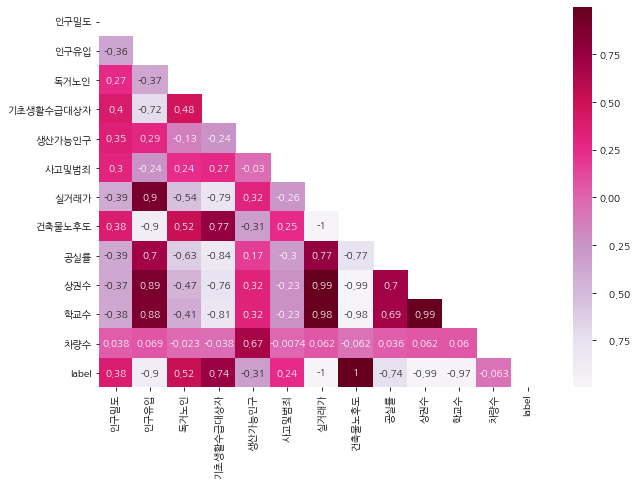

<Figure size 1080x720 with 0 Axes>

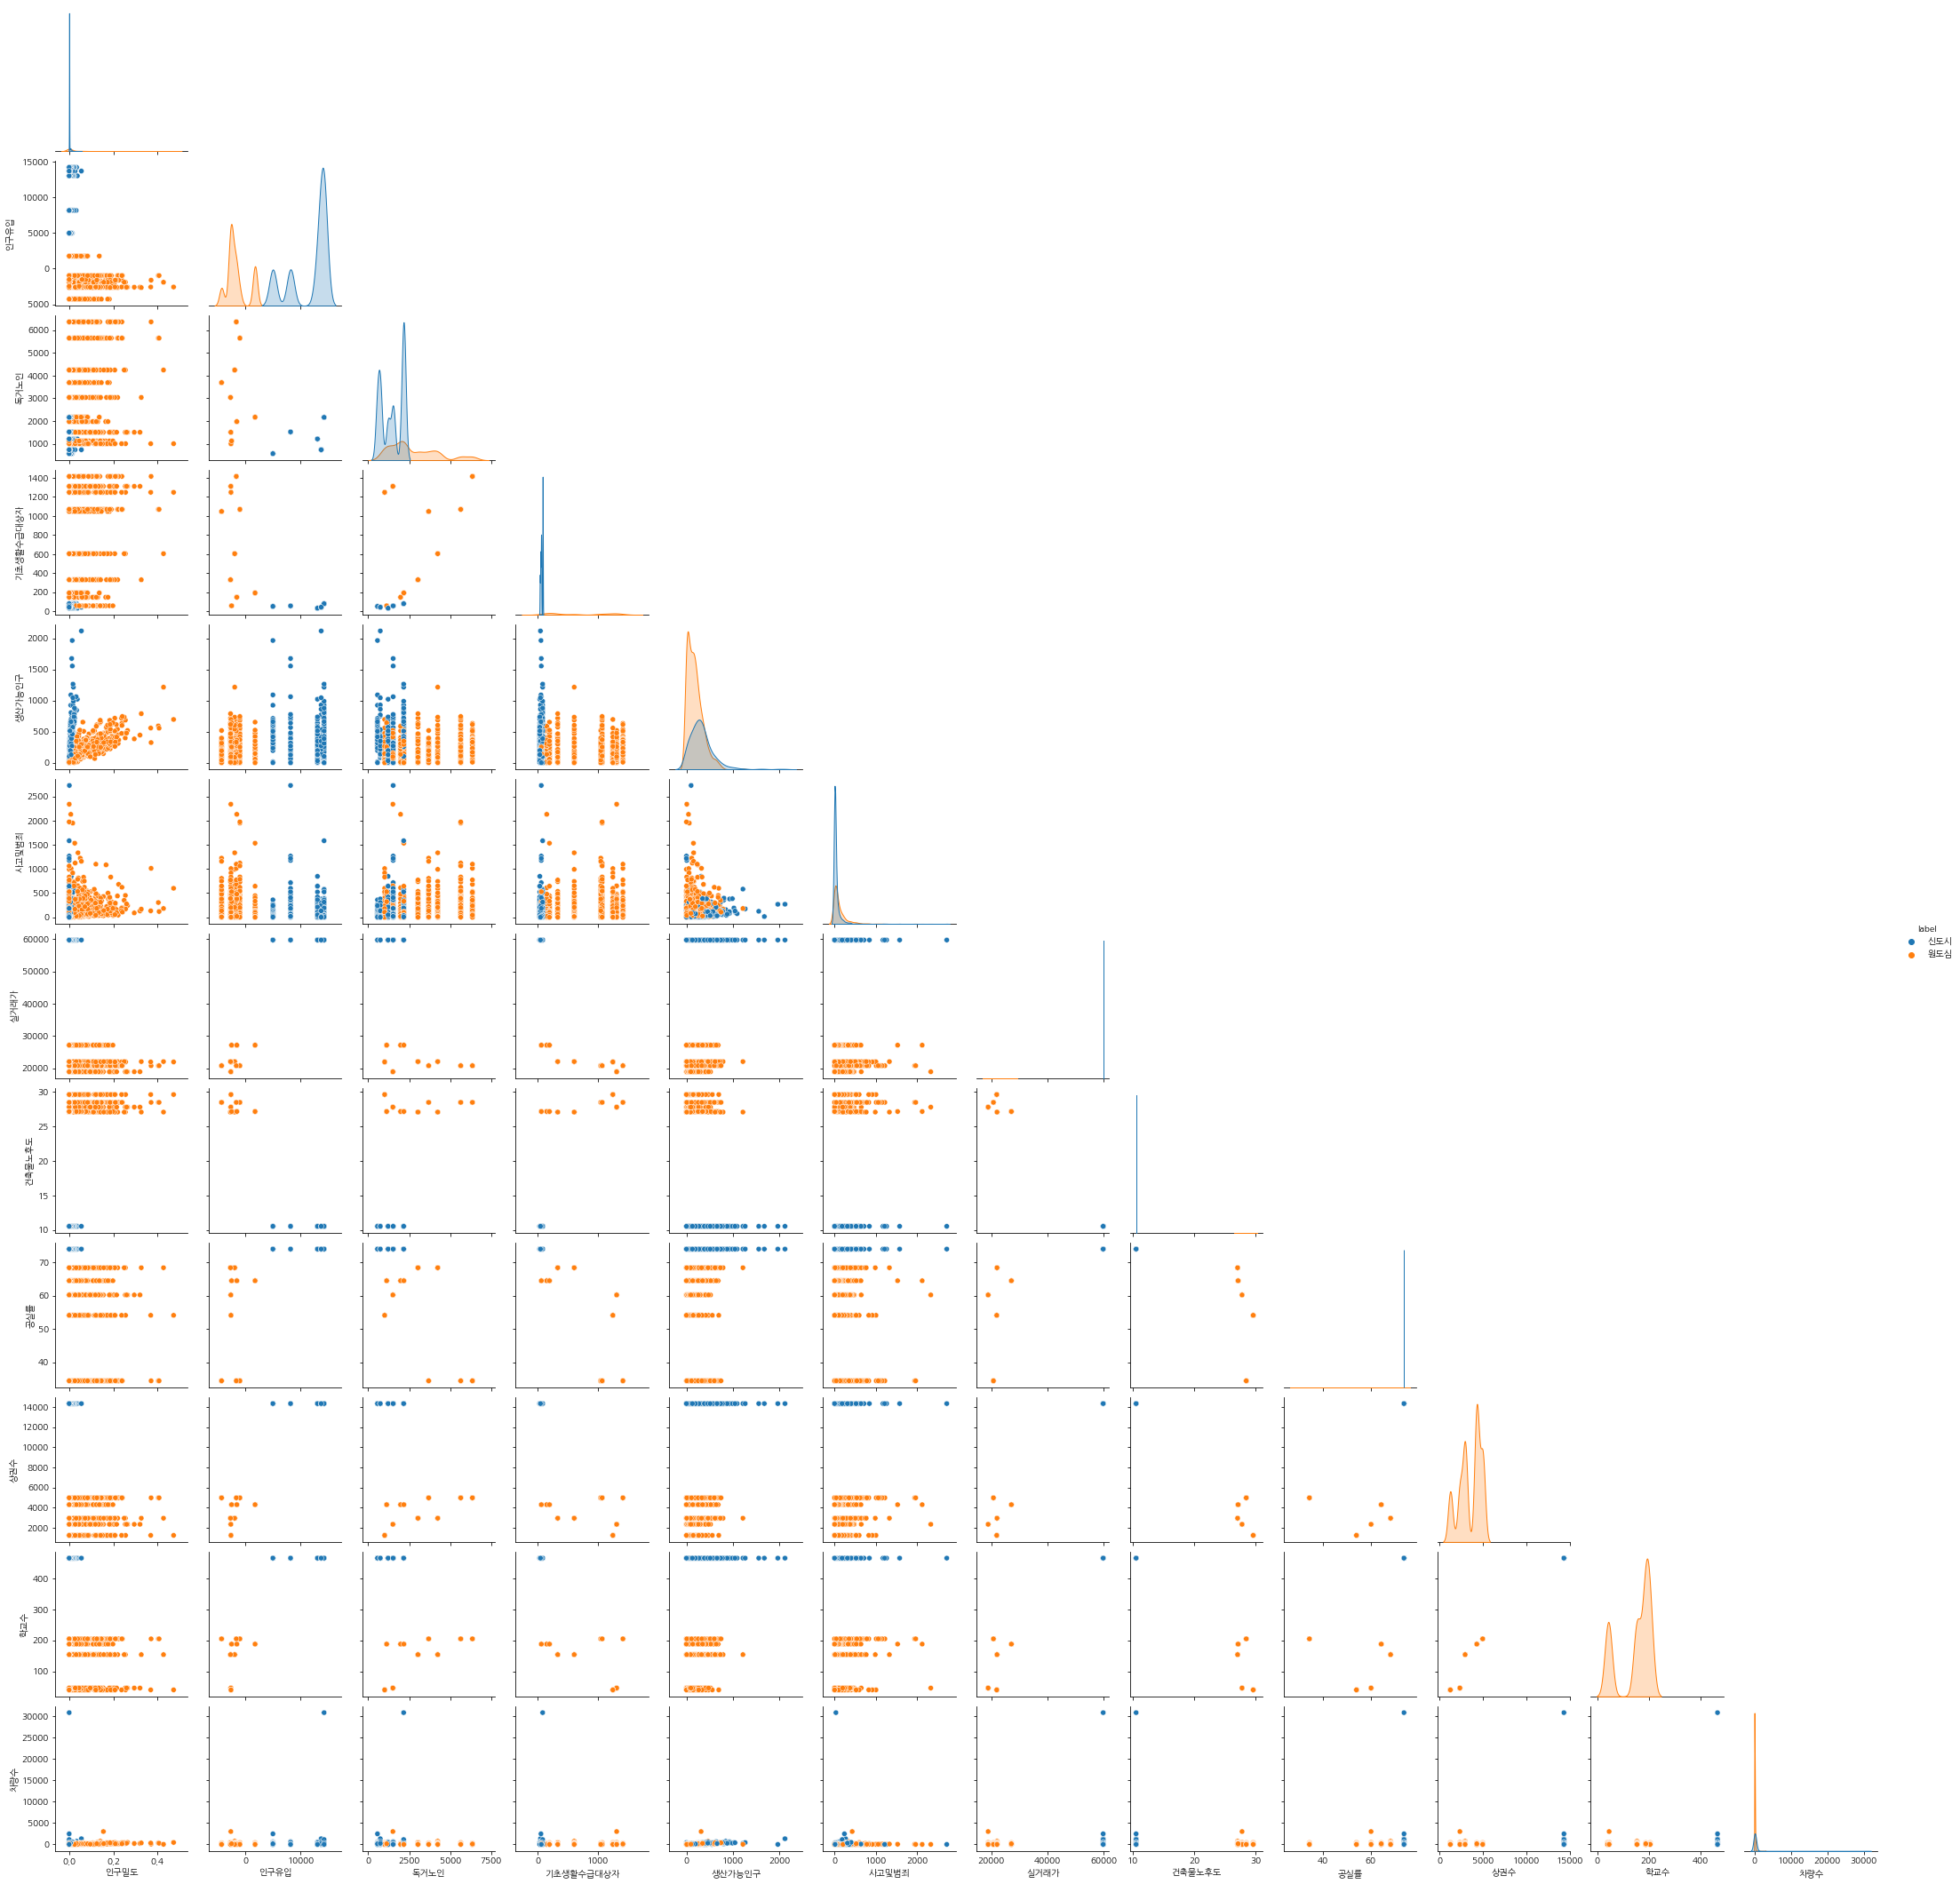

In [5]:
##상관분석

#변수 리스트
col1 = ['gid', '인구밀도', '인구유입', '독거노인', '기초생활수급대상자', '생산가능인구', '사고및범죄']
col2 = ['gid', '실거래가', '건축물노후도', '공실률', '상권수', '학교수', '차량수', 'label']
features = col1[1:]+col2[1:]

#데이터 로드
df1 = pd.read_csv('compas_people_final2.csv')
df2 = pd.read_csv('compas_building_final2.csv')
df = pd.merge(df1[col1], df2[col2], on='gid', how='inner')

#결측값 처리
print('~전처리 전 결측값~')
display(df.isnull().sum()) 
df['label'] = df['label'].apply(lambda x: 1 if x=='원도심' else 0)
df['gid2'] = df['gid'].apply(lambda x: int(x[2:]))
df_imputed = fast_knn(df.iloc[:, 1:].values, k=30)
df2 = pd.DataFrame(df_imputed, columns=df.columns[1:]).iloc[:, :-1]
df2['gid'] = df['gid']
print('~전처리 후 결측값~')
display(df2.isnull().sum()) 

#Heatmap
plt.figure(figsize=(10,7))
corr = df[features].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            annot=True,
            mask=mask,
            cmap='PuRd')

#Pairplot
df['label'] = df['label'].apply(lambda x: '원도심' if x==1 else '신도시')
plt.figure(figsize=(15,10))
sns.pairplot(df,
             vars=features[:-1],
             hue='label',
             diag_kind='kde',
             corner=True)

#데이터 저장
tmp = gpd.read_file('compas_gid_final.geojson', encoding='utf-8-sig')
df2 = pd.merge(df2, tmp[['gid', 'hjd_nm', 'bjd_nm']], on='gid', how='left')
df2.to_csv('compas_df_final.csv', encoding='utf-8-sig', index=False)

### 4.1 최종 쇠퇴 요인(2) - 머신러닝

* 활용 데이터
    * compas_df_final.csv: 최종 쇠퇴 요인 데이터
* 최종 산출물
    * X(산출 데이터 없음)
* 분석 내용
    * 상관분석을 살펴본 변수가 대부분 쇠퇴와 관련이 높았기에 실제로 해당 변수들로 원도심 예측 모형을 적합해보았다.
    * 총 8개의 머신러닝 분류 모형을 적합한 결과, 모든 모델에서 정확도가 1로 완벽하게 원도심과 신도시를 분류하였다.
    * 이때 일반적인 기계학습 모형이라면 변수 간 다중공선성이 의심되거나 변수 수를 줄일 필요가 있을 것이다.
    * 하지만 본 분석은 쇠퇴 예측이 아닌 쇠퇴를 가장 잘 반영하는 지수 개발이기 때문에 쇠퇴를 잘 나타내는 변수들을 제대로 찾았다고 판단했다.
    * 즉, 인구 및 건물에 대한 모든 변수들을 적절히 반영하여 최종적으로 연수구 맞춤 쇠퇴 지수를 만들 수 있을 것이라 기대한다.
    * 또한 랜덤포레스트 모형의 Feature Importance를 추가적으로 확인하여 어떤 변수가 중요하게 작용했는지도 확인 가능하다.
* 분석 결과
    * LogisticRegression -> 정확도 1.0000
    * RandomForest -> 정확도 1.0000
    * ExtraTrees -> 정확도 1.0000
    * AdaBoost -> 정확도 1.0000
    * SGD -> 정확도 1.0000
    * LGBM -> 정확도 1.0000
    * CatBoost -> 정확도 1.0000
    * SVC -> 정확도 1.0000

전체 features: ['인구밀도', '인구유입', '독거노인', '기초생활수급대상자', '생산가능인구', '사고및범죄', '실거래가', '건축물노후도', '공실률', '상권수', '학교수', '차량수']
모델 features: ['인구밀도', '인구유입', '독거노인', '기초생활수급대상자', '생산가능인구', '사고및범죄', '실거래가', '건축물노후도', '공실률', '상권수', '학교수', '차량수']
~다양한 머신러닝 분류 모형 적합~
LogisticRegression 정확도: 1.0000
RandomForestClassifier 정확도: 1.0000
ExtraTreesClassifier 정확도: 1.0000
AdaBoostClassifier 정확도: 1.0000
SGDClassifier 정확도: 1.0000
LGBMClassifier 정확도: 1.0000
CatBoostClassifier 정확도: 1.0000
SVC 정확도: 1.0000

~최종 랜덤포레스트 모형 적합 결과~
최적 스코어: 1.0, 최적 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

~최종 랜덤포레스트 모형 평가 지표~
Accuracy:
 1.0
Confusion Matrix:
 [[1145    0]
 [   0  577]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1145
         1.0       1.00      1.00      1.00       577

    accuracy                           1.00      1722
   macro avg       1.00      1.00      1.00      1722
weighted av

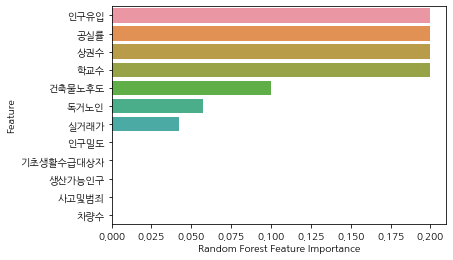

In [7]:
##머신러닝

#데이터 로드
df = pd.read_csv('compas_df_final.csv')
print('전체 features:', list(df.columns[:-4]))

#X/y 분리
y = df['label']
X = df.drop(['gid', 'label', 'hjd_nm', 'bjd_nm'], axis=1)

#스케일링
sc = MinMaxScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

#모델 변수 
features = ['인구밀도', '인구유입', '독거노인', '기초생활수급대상자', '생산가능인구', '사고및범죄', 
            '실거래가', '건축물노후도', '공실률', '상권수', '학교수', '차량수']
X = X[features]
print('모델 features:', features)

#Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##분류 모델 적합

#모델 객체 정의
from sklearn import svm
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
ext = ExtraTreesClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
sgd = SGDClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
cat = CatBoostClassifier(silent=True, random_state=42)
svm = svm.SVC(random_state=42)

#모델 성능 평가
print('~다양한 머신러닝 분류 모형 적합~')
models = [lr, rf, ext, ada, sgd, lgbm, cat, svm]
for model in models:
    name = model.__class__.__name__
    scores = cross_val_score(model, X=X_train, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)
    score = np.mean(scores) 
    print('%s 정확도: %.4f' % (name, score))  
    
#하이퍼파라미터 튜닝
#print(help(RandomForestClassifier))
params = {'n_estimators': [10, 50, 100],
          'max_depth': [3, 5, 7],
          'min_samples_split': [2, 4, 5],
          'min_samples_leaf': [1, 3, 5] }
grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print('\n~최종 랜덤포레스트 모형 적합 결과~')
print('최적 스코어: {}, 최적 파라미터: {}'.format(grid.best_score_, grid.best_params_))

#최종 모델
final = RandomForestClassifier(**grid.best_params_)
final.fit(X_train, y_train)
y_pred = final.predict(X_test)

#평가 지표
print('\n~최종 랜덤포레스트 모형 평가 지표~')
print('Accuracy:\n', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

#변수 중요도 
def plot_feature_importance(model):
    tmp = pd.DataFrame()
    tmp['idx'] = X.columns
    tmp['val'] = final.feature_importances_
    tmp = tmp.sort_values(by='val', ascending=False)
    sns.barplot(x=tmp['val'],
                y=tmp['idx'],
                orient='h')
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    
print('~최종 랜덤포레스트 모형 변수중요도~')
plot_feature_importance(final)

### 4.2 최종 쇠퇴 지수
* 활용 데이터
    * compas_df_final.csv: 최종 쇠퇴 요인 데이터
* 최종 산출물
    * compas_index_final.csv: 최종 쇠퇴 지수 데이터
* 분석 내용
    * 위에서부터 분석한 내용을 바탕으로 우리가 선정한 인구 및 건물 요인이 쇠퇴와 충분히 유의한 관계가 있음을 확인했다.
    * 따라서 선정한 쇠퇴 요인별로 적절한 가중치를 곱하여 더하면 최종 쇠퇴 지수로 활용할 수 있을 것이라 기대했다.
    * 특히 상관분석에서 살펴본 label(원도심/신도시)과 각 쇠퇴 요인의 상관계수를 가중치로 활용하여 양/음의 상관관계를 반영하고자 했다.
    * 즉, 최종 쇠퇴 지수는 인구/건물로 나누어 각각 변수와 상관계수를 곱해서 더해서 계산한 후, 0~10 사이로 스케일링하여 점수화 했다.
    * 이를 수식으로 나타내면 다음과 같다. 
    > 최종쇠퇴지수 = (SUM(쇠퇴요인x상관계수)-MIN(SUM(쇠퇴요인x상관계수))) / (MAX(SUM(쇠퇴요인x상관계수))-MIN(SUM(쇠퇴요인x상관계수))) x 10
    * 산출한 쇠퇴 지수를 바탕으로 살펴본 결과, '연수동',' 청학동'이 특히 쇠퇴 위험 지역으로 관찰되어 활성화 방안이 필요해 보인다. 
    * 반대로 '동춘동', '송도동'은 쇠퇴 지수가 낮고, 특히 동춘동은 원도심으로 분류되지만 원도심 활성화 우선순위에서 배제될 수 있을 것이다.
* 분석 결과
    * 인구 쇠퇴 지수 높은 순: 연수동, 청학동, 선학동, 옥련동, 동춘동, 송도동
    * 건물 쇠퇴 지수 높은 순: 청학동, 연수동, 옥련동, 선학동, 동춘동, 송도동

In [8]:
#데이터 로드
print('~쇠퇴 요인 통계값~')
df = pd.read_csv('compas_df_final.csv')
display(df.groupby('bjd_nm').mean())

#가중치 계산
col1 = ['인구밀도', '인구유입', '독거노인', '기초생활수급대상자', '생산가능인구', '사고및범죄', 'label']
col2 = ['실거래가', '건축물노후도', '공실률', '상권수', '학교수', '차량수', 'label']
corr1 = df[col1].corr()['label']
corr2 = df[col2].corr()['label']
tmp1 = pd.DataFrame({'요인': corr1.index[:-1],
                     '가중치': corr1.values[:-1],
                     '구분': '인구'})
tmp2 = pd.DataFrame({'요인': corr2.index[:-1],
                     '가중치': corr2.values[:-1],
                     '구분': '건물'})
res = pd.concat([tmp1, tmp2], axis=0)
print('~쇠퇴 요인별 가중치~')
display(res)

#쇠퇴 요인 스케일링
sc = MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.iloc[:, :-4]), columns=df.columns[:-4])

#인구 쇠퇴 지수 
인구점수_li = [] 
for i in range(len(df)): 
    인구점수 = []
    for j in res[res['구분']=='인구']['요인'].unique():
        인구점수.append(df_scaled.loc[i, j] * res[res['요인']==j]['가중치'].values * 10)
    인구점수_li.append(sum(인구점수[0]))
df['인구쇠퇴지수'] = 인구점수_li 
    
#건물 쇠퇴 지수
건물점수_li = [] 
for i in range(len(df)):
    건물점수 = []
    for j in res[res['구분']=='건물']['요인'].unique():
        건물점수.append(df_scaled.loc[i, j] * res[res['요인']==j]['가중치'].values * 10)
    건물점수_li.append(sum(건물점수[0]))
df['건물쇠퇴지수'] = 건물점수_li 

#쇠퇴 지수 스케일링
df['인구쇠퇴지수'] = ((df['인구쇠퇴지수']-df['인구쇠퇴지수'].min()) / (df['인구쇠퇴지수'].max()-df['인구쇠퇴지수'].min())) * 10
df['건물쇠퇴지수'] = ((df['건물쇠퇴지수']-df['건물쇠퇴지수'].min()) / (df['건물쇠퇴지수'].max()-df['건물쇠퇴지수'].min())) * 10

#데이터 저장
print('~최종 쇠퇴 지수~')
df = df[['label', 'gid', 'hjd_nm', 'bjd_nm', '인구쇠퇴지수', '건물쇠퇴지수']]
df.to_csv('compas_index_final.csv', encoding='utf-8-sig', index=False)
display(df.groupby('bjd_nm')[['인구쇠퇴지수', '건물쇠퇴지수']].mean())

~쇠퇴 요인 통계값~


,인구밀도,인구유입,독거노인,기초생활수급대상자,생산가능인구,사고및범죄,실거래가,건축물노후도,공실률,상권수,학교수,차량수,label
bjd_nm,,,,,,,,,,,,,
동춘동,0.015220,536.641766,2004.760611,167.176570,217.948130,65.051650,27151.995786,27.167324,64.461408,4310.0,188.0,112.796574,1.0
선학동,0.026801,-2571.000000,1002.000000,1249.000000,193.550911,82.784715,21961.297170,29.630660,54.100719,1270.0,40.0,108.398676,1.0
송도동,0.000825,11482.488859,1453.891099,63.698286,248.281391,41.183096,59749.200806,10.530606,73.957845,14323.0,466.0,149.949101,0.0
연수동,0.045371,-2640.922878,4896.143702,1141.794035,212.531231,189.829289,20785.518418,28.493175,34.475488,4988.0,205.0,114.790210,1.0
옥련동,0.022425,-2270.161137,3650.080569,469.947867,192.052509,96.609852,22062.409773,27.083772,68.360937,2969.0,154.0,104.468856,1.0
청학동,0.044088,-2596.000000,1505.000000,1312.000000,172.824519,129.797077,18912.964611,27.807638,60.202788,2365.0,46.0,115.149317,1.0


~쇠퇴 요인별 가중치~


,요인,가중치,구분
0,인구밀도,0.375434,인구
1,인구유입,-0.889251,인구
2,독거노인,0.526993,인구
3,기초생활수급대상자,0.736901,인구
4,생산가능인구,-0.206319,인구
5,사고및범죄,0.246359,인구
0,실거래가,-0.995157,건물
1,건축물노후도,0.998154,건물
2,공실률,-0.739934,건물
3,상권수,-0.990719,건물


~최종 쇠퇴 지수~


,인구쇠퇴지수,건물쇠퇴지수
bjd_nm,,
동춘동,0.321611,7.982422
선학동,0.566343,9.253523
송도동,0.017439,0.000000
연수동,0.958745,9.541448
옥련동,0.473864,9.228762
청학동,0.931628,10.000000


# 5. 민원 심층 분석

### 5.1 전체 민원 분석
* 활용 데이터
    * compas_gid_final.geojson: 격자 전처리 데이터
    * 8_연수구_고충민원_격자매핑.xlsx: 콤파스 제공 데이터
    * 9_연수구_민원현황_격자매핑.xlsx: 콤파스 제공 데이터
* 최종 산출물
    * wordrank.csv: KR-WordRank 알고리즘으로 추출한 민원 키워드
    * wordcloud.png: 추출한 민원 키워드로 생성한 연수구 워드클라우드
* 분석 내용
    * 마지막으로 연수구 주민들의 실제 불만 및 요구사항을 볼 수 있는 민원을 분석하여 활성화 방향성을 고민했다.
    * 본격적인 민원 분석에 앞서 전반적인 연수구 내 민원 추세를 확인하기 위한 간단한 EDA를 진행했다.
    * 그래프를 통해 지난 10년간 시간이 흐를 수록 민원이 큰 폭으로 증가해온 것을 확인할 수 있었다.
    * 이때, 앞에서 살펴본 통계 분석에 의해서 민원건수는 원도심과 신도시를 구분하는 유의한 변수가 아니었다.
    * 즉, 민원건수 자체를 파악하기 보다는 그 내용을 효율적으로 확인하는 것이 필요하다고 판단했다.
    * 따라서 연수구 전체에 대한 민원 키워드를 KR-WordRank 알고리즘을 이용해 추출해 주요 민원 내용을 파악하고자 했다.
    * 추출한 키워드를 보기 쉽게 연수구 심볼 모양의 워드클라우드로 확인한 결과, 주로 교통과 관련된 민원이 다수 제기되었다.
* 분석 결과
    * 연도별 민원 추세: 지난 10년간 시간이 흐를 수록 민원건수가 큰 폭으로 증가
    * 월별 민원 추세: 주로 4월, 1월, 12월의 민원건수가 가장 많음
    * 민원 키워드 추출: 불법, 신고, 안전, 주차, 정차 등 교통과 관련된 문제 다수 

<>:43: DeprecationWarning: invalid escape sequence \?
<>:43: DeprecationWarning: invalid escape sequence \?
<>:43: DeprecationWarning: invalid escape sequence \?
<ipython-input-133-2f9c7296658b>:43: DeprecationWarning: invalid escape sequence \?
  sentence = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',sentence)


~연도별 민원 추세~


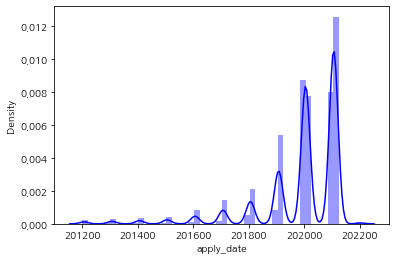

~월별 민원 추세~


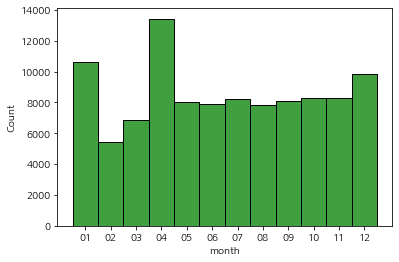

,apply_date,compl_contents,gid,bjd_nm,label,geometry,month
0,201201,건축법상 도로의 인정여부,다사279350,연수동,원도심,"MULTIPOLYGON (((126.68527 37.41132, 126.68526 ...",01
1,201201,불법쓰레기투기와 인도의 무단주차 문제 고밥합니다.,다사249327,송도동,신도시,"MULTIPOLYGON (((126.65160 37.39036, 126.65159 ...",01
2,201201,취득세 납부시 현금과 신용카드 동시사용은 왜 아되나요?,다사257321,송도동,신도시,"MULTIPOLYGON (((126.66070 37.38501, 126.66069 ...",01
3,201201,비주거 관리비 배분,다사247327,송도동,신도시,"MULTIPOLYGON (((126.64935 37.39034, 126.64933 ...",01
4,201201,누수하자,다사244336,송도동,신도시,"MULTIPOLYGON (((126.64586 37.39843, 126.64585 ...",01
...,...,...,...,...,...,...,...
102878,202206,연수구 행정동우회 사무실구입 요청,다사267364,연수동,원도심,"MULTIPOLYGON (((126.67157 37.42385, 126.67156 ...",06
102879,202206,청량산 공사구간 흡연,다사264341,동춘동,원도심,"MULTIPOLYGON (((126.66841 37.40310, 126.66840 ...",06
102880,202206,동춘동 대림3차아파트 하수관로 공사관련,다사262345,동춘동,원도심,"MULTIPOLYGON (((126.66611 37.40668, 126.66610 ...",06
102881,202206,연수2차현대대림아파트 동별대표 후보자 자격여부 관련,다사268346,동춘동,원도심,"MULTIPOLYGON (((126.67288 37.40763, 126.67287 ...",06


scan vocabs ... 
num vocabs = 4104
done = 17 Early stopped.
~민원 키워드 TOP10~


,word,rank
0,불법,84.269084
1,신고,84.023909
2,송도,40.407657
3,안전,36.940908
4,정차,34.705499
5,신문고,30.014443
6,요청,21.386422
7,주차,18.088873
8,횡단보,17.596944
9,연수,16.691021


~민원 키워드 워드클라우드~


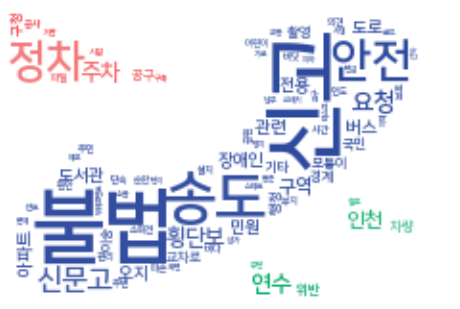

In [133]:
#데이터 로드
df = gpd.read_file('compas_gid_final.geojson', encoding='utf-8-sig')
df8 = pd.read_excel('8_연수구_고충민원_격자매핑.xlsx', sheet_name=None)
df8 = pd.concat(df8, ignore_index=True)
df9 = pd.read_excel('9_연수구_민원현황_격자매핑.xlsx', sheet_name=None)
df9 = pd.concat(df9, ignore_index=True)

#데이터 병합
df89 = pd.concat([df8, df9])
df89 = df89.sort_values(by='apply_date')
df89.reset_index(drop=True, inplace=True)
df89['compl_contents'] = df89['compl_contents'].astype('str')
df = pd.merge(df89, df[['gid', 'bjd_nm', 'label', 'geometry']], how='left', on='gid')

#데이터 시각화
df.sort_values(by='apply_date')
df['apply_date'] = df['apply_date'].astype('str')
print('~연도별 민원 추세~')
sns.distplot(df['apply_date'], color='blue')
plt.show()
print('~월별 민원 추세~')
df['month'] = df['apply_date'].apply(lambda x: x[-2:])
sns.histplot(df['month'], color='green')
plt.show()

#데이터 저장
df.to_csv('compas_compl_final.csv', encoding='utf-8-sig', index=False)
display(df)

#텍스트 전처리 함수
def preprocess_review(review): 
    okt = Okt()
    total_review = ''
    for idx in range(len(review)):
        sentence = review[idx]
        sentence = re.sub('\n','',sentence)
        sentence = re.sub('\u200b','',sentence)
        sentence = re.sub('\xa0','',sentence)
        sentence = re.sub('([a-zA-Z])','',sentence)
        sentence = re.sub('[ㄱ-ㅎㅏ-ㅣ]+','',sentence)
        sentence = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',sentence)
        if len(sentence) == 0:
            continue
        sentence = okt.pos(sentence, stem=True)
        word = []
        for i in sentence:
            if not i[1] == 'Noun':
                continue
            if len(i[0]) == 1:
                continue
            word.append(i[0])
        word = ' '.join(word)
        word += '. '
        total_review += word
    return total_review.split('. ')

#키워드 추출 함수
def compl_keyword(review, stopwords): 
    texts = preprocess_review(review)
    keywords = summarize_with_keywords(texts, min_count=10, max_length=10,
               beta=0.85, max_iter=20, stopwords=stopwords, verbose=True)
    return keywords

#민원 키워드 추출
stopwords = ['건', '대한', '의한', '문의', '질의', '분동', '여부']
keywords = compl_keyword(df['compl_contents'], stopwords)
rank = pd.DataFrame({'word': [i[0] for i in list(keywords.items())],
                     'rank': [i[1] for i in list(keywords.items())]})
rank.to_csv('wordrank.csv', encoding='utf-8', index=False)
print('~민원 키워드 TOP10~')
display(rank.head(10))

#워드클라우드 생성 함수
def compl_wordcloud(stopwords, keywords): 
    font_path = 'NanumSquare_acB.ttf'
    icon = Image.open('연수구_logo.png')
    mask = Image.new("RGB", icon.size, (255,255,255))
    mask.paste(icon,icon)
    mask = np.array(mask)
    passwords = {word:score for word, score in sorted(
                 keywords.items(), key=lambda x:-x[1])[:500] if not (word in stopwords)}
    krwordrank_cloud = WordCloud(
                       font_path = font_path,
                       width = 800,
                       height = 600,
                       max_words=200,
                       background_color="white",
                       mask=mask
                       )
    krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)
    image_colors = ImageColorGenerator(mask)
    
    fig = plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.imshow(krwordrank_cloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.savefig('wordcloud.png')
    
    return plt.show()

#민원 워드클라우드
print('~민원 키워드 워드클라우드~')
compl_wordcloud(stopwords, keywords)

### 5.2 동별 민원 분석(1) - 연수동
* 활용 데이터
    * X(5.1 데이터 이어서 사용)
* 최종 산출물
    * X(산출 데이터 없음)
* 분석 결과
    * Topic1: 교통위반, 차량이송, 차선침범, 주사주정 등 교통 문제
    * Topic2: 교차로, 모퉁이 등 도로 문제 및 불법촬영 문제
    * Topic3: 버스정류소, 아파트 공원, 도로 파손 등 생활 문제
    * Topic4: 불법주차, 주차구역 등 주차 문제
* 분석 내용
    * 4.2절의 최종 쇠퇴 지수로 살펴봤을 때, 연수동과 청학동이 쇠퇴 활성화 1, 2위 순위로 뽑혔었다.
    * 특히 연수동은 인구쇠퇴지수 1위 건물쇠퇴지수 2위, 청학동은 건물쇠퇴지수 1위, 인물쇠퇴지수 2위에 랭크했다.
    * 즉, 두 지역 모두 쇠퇴가 심하지만 쇠퇴가 심한 요인이 다르므로 이에 따른 활성화 대책 및 방안도 달라질 것이다.
    * 여기에 각 동별 민원 분석을 통해 어떤 민원이 많고, 개선이 필요한지 함께 살펴보면서 방향성을 제안하고자 했다.
    * 먼저 인물쇠퇴지수가 높은 연수동의 민원에 대해서 토픽모델링을 진행해 어떤 민원 토픽과 키워드가 주를 이루는지 확인했다.
    * 토픽을 총 4개로 나눴으나 전체적으로 공통점을 가진 부분도 많았으며 특히 교통, 주차, 도로, 불법촬영 등의 키워드가 눈에 띈다.
    * 좀더 자세한 토픽별 키워드 및 중요도는 pyLDAvis 시각 자료로 확인가능하다.

In [138]:
##For 연수동 

#민원 텍스트 벡터화
tmp = df[df['bjd_nm']=='연수동']['compl_contents'].reset_index(drop=True)
texts = preprocess_review(tmp)
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2, ngram_range=(1,2))
feat_vect = count_vectorizer.fit_transform(texts)
print('CountVectorizer Shape:', feat_vect.shape)

#LDA 토픽모델링
lda = LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=500, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, perp_tol=0.1,
             random_state=2022, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
lda.fit(feat_vect)

#토픽별 상위 연관어 출력
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index+1)
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:num_top_words]
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)
print('~토픽별 연관어 상위 TOP10~')
feature_names = count_vectorizer.get_feature_names()
display_topics(lda, feature_names, 10)

#민원별 토픽 할당
doc_topic = lda.transform(feat_vect)
doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])
doc_topic_df = doc_topic_df.join(df)
print('~토픽별 관련 민원 개수~')
display(doc_topic_df.groupby('Topic')[['Doc_Num']].count())

#LDA 토픽모델링 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis) 

CountVectorizer Shape: (15289, 1000)
~토픽별 연관어 상위 TOP10~
Topic # 1
인천 민원 이송 위반 연수구 차로 침범 주정 제보 국민
Topic # 2
모퉁이 교차로 교차로 모퉁이 모퉁이 불법 촬영 시간 촬영 시간 버스 파일 신고 파일
Topic # 3
버스정류소 버스정류소 불법 관련 아파트 연수 공원 요청 도로 파손 설치
Topic # 4
주차 기타 기타 불법 구역 정차 불법 불법 주차 장애인 신문 안전 신문 구역 불법
~토픽별 관련 민원 개수~


,Doc_Num
Topic,
0,6964
1,2576
2,3441
3,2308


### 5.2 동별 민원 분석(2) - 청학동
* 활용 데이터
    * X(5.1 데이터 이어서 사용)
* 최종 산출물
    * X(산출 데이터 없음)
* 분석 결과
    * Topic1: 버스정류소, 어린이보호구역 등 교통 문제 및 불법촬영 문제
    * Topic2: 불법 주정차 등 주차 문제 및 기타 문제
    * Topic3: 장애인 전용 주차구역 등 주차 문제
    * Topic4: 교차로, 모퉁이, 사거리 등 도로 문제
* 분석 내용
    * 이어서 건물쇠퇴지수가 높았던 청학동의 민원에 대해서 같은 방법으로 토픽모델링을 진행하고 결과를 확인했다.
    * 전체적으로 봤을 때 연수동 민원과 마찬가지로 교통, 주차, 도로, 불법촬영 문제 등이 큰 토픽을 차지했다. 
    * 즉, 동별로 민원 차이가 있을 것이라는 처음의 가정과는 달라져 민원으로 활성화 방안을 제시하는데는 한계가 있었다.
    * 하지만 해당 부분이 연수구 전체 민원 키워드에도 상당 부분 차지하는 만큼 연수구 전반적으로 개선되어야 할 문제일 것이다.
    * 민원 내용을 정리하자면 교통 인프라에 전반적인 개선이 필요해보이며, 불법촬영 문제에 대해서도 고민해봐야 할 것이다.

In [139]:
##For 청학동

#민원 텍스트 벡터화
tmp = df[df['bjd_nm']=='청학동']['compl_contents'].reset_index(drop=True)
texts = preprocess_review(tmp)
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2, ngram_range=(1,2))
feat_vect = count_vectorizer.fit_transform(texts)
print('CountVectorizer Shape:', feat_vect.shape)

#LDA 토픽모델링
lda = LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=500, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, perp_tol=0.1,
             random_state=2022, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)
lda.fit(feat_vect)

#토픽별 상위 연관어 출력
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index+1)
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:num_top_words]
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)
print('~토픽별 연관어 상위 TOP10~')
feature_names = count_vectorizer.get_feature_names()
display_topics(lda, feature_names, 10)

#민원별 토픽 할당
doc_topic = lda.transform(feat_vect)
doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])
doc_topic_df = doc_topic_df.join(df)
print('~토픽별 관련 민원 개수~')
display(doc_topic_df.groupby('Topic')[['Doc_Num']].count())

#LDA 토픽모델링 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis) 

CountVectorizer Shape: (10382, 1000)
~토픽별 연관어 상위 TOP10~
Topic # 1
버스정류소 버스정류소 불법 촬영 어린이 시간 보호 보호 구역 어린이 보호 촬영 시간 구역
Topic # 2
기타 기타 불법 청학동 정차 불법 인천 연수구 신문 안전 신문 인천 연수구 연수구 청학동
Topic # 3
주차 장애인 구역 불법 주차 구역 불법 전용 장애인 전용 전용 구역 주차 불법 위반
Topic # 4
교차로 모퉁이 교차로 모퉁이 모퉁이 불법 불편 불편 신고 버스 버스 불편 사람 사거리
~토픽별 관련 민원 개수~


,Doc_Num
Topic,
0,7225
1,996
2,1099
3,1062
